In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import scipy.stats as stats
%matplotlib inline

# Data preprocessing

In [2]:
data=pd.read_csv('zomato.csv')


In [3]:
data.head(10)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [4]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [5]:
#dropping unneccesary columns 
data.drop(['url', 'address', 'phone','name','listed_in(city)','cuisines','dish_liked','reviews_list','menu_item'], axis=1, inplace = True)

In [6]:
#renaming some columns
data.rename(columns = {"approx_cost(for two people)" : "cost_two", "listed_in(type)" : "service_type"}, inplace = True)

<ul> <li>Converting cost_two to float and slicing rate column.
<li>Since cost_two has comma, we can't directly convert it to float

In [7]:
data['cost_two']=data['cost_two'].astype(str)
data['cost_two']=data['cost_two'].apply(lambda x:x.replace(',','')).astype(float)

In [8]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
data['rate']=data['rate'].replace('NEW',np.NaN)
data['rate']=data['rate'].replace('-',np.NaN)
data['rate']=data['rate'].astype(str)

In [10]:
data['rate']=data['rate'].apply(lambda x:x.replace('/5','')).astype(float)

# Missing values

<AxesSubplot:>

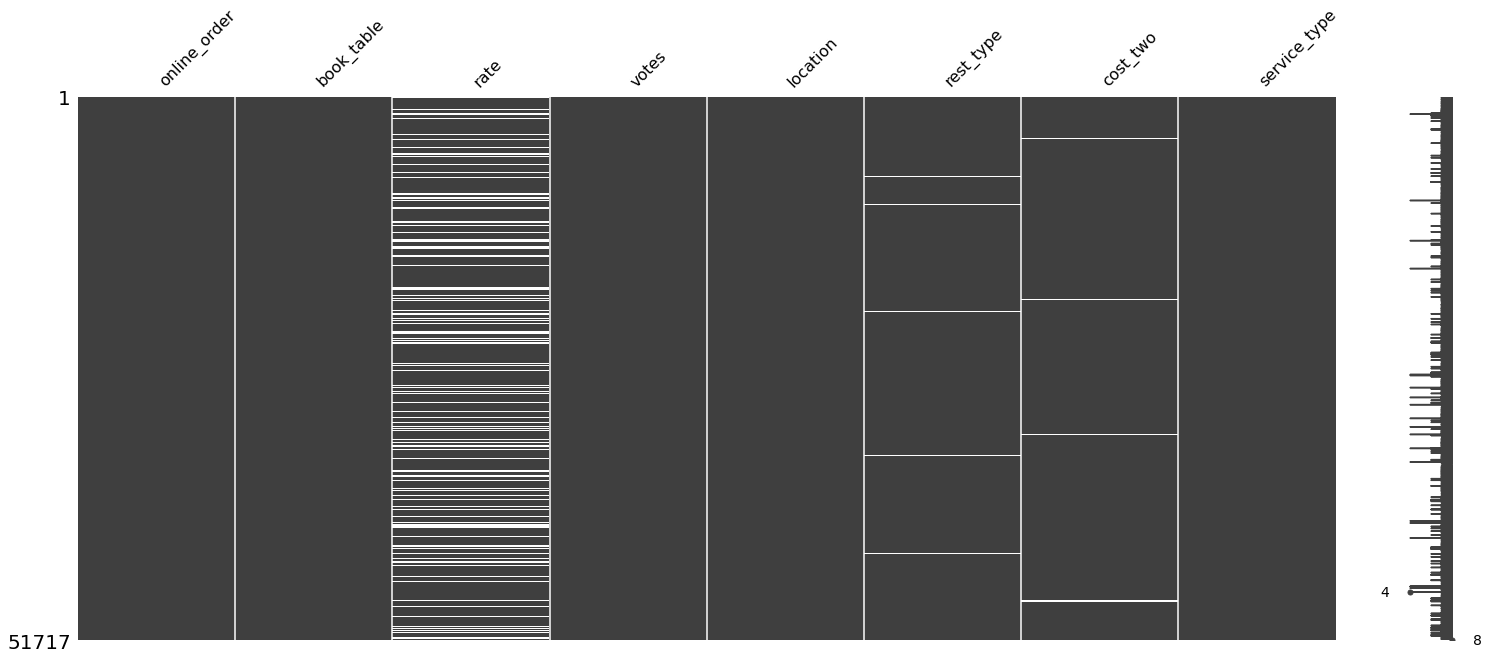

In [11]:
msno.matrix(data)

In [12]:
data.isna().sum()

online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cost_two          346
service_type        0
dtype: int64

<ul> <li>Clearly, dish_liked column has almost half values missing . We will drop it because anyways we won't use it in our prediction.</li>
    <li> Drop missing values from rest_type </li>
    <li>Replacing missing values of rate with mean.</li>

In [13]:
data['rate'] = data['rate'].fillna(data['rate'].mean())
data['cost_two'] = data['cost_two'].fillna(data['cost_two'].mean())

In [14]:
data.dropna(how='any',inplace=True)

# Exploratory data analysis

<AxesSubplot:xlabel='online_order', ylabel='count'>

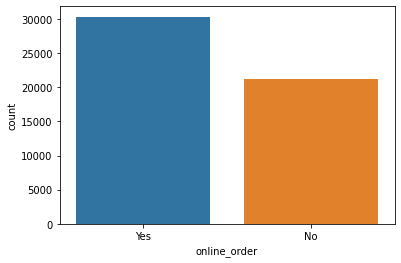

In [15]:
sns.countplot(x=data['online_order'])

Many resaturants still don't have online ordering in place.

<AxesSubplot:xlabel='service_type', ylabel='count'>

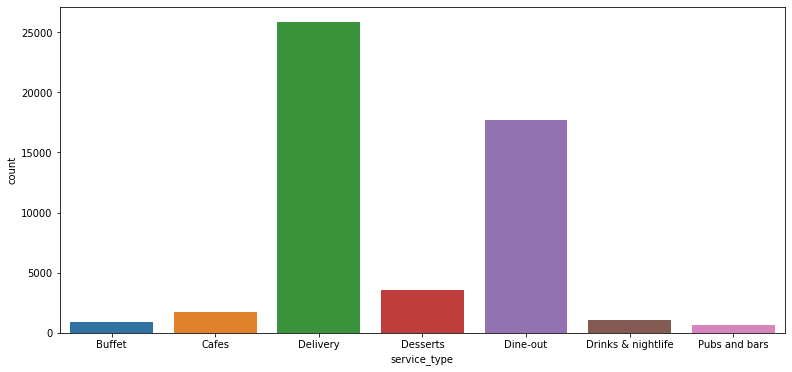

In [16]:
plt.figure(figsize=(13,6))
sns.countplot(x=data['service_type'])

With the advent of Zomato and similar apps, we can understand the delivery boom.

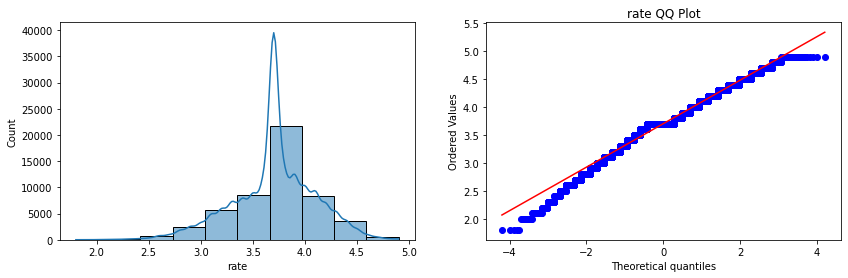

In [17]:
#analysing the distribution of rate
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x=data['rate'],kde=True,bins=10)

plt.subplot(122)
stats.probplot(data['rate'], dist="norm", plot=plt)
plt.title('rate QQ Plot')
plt.show()

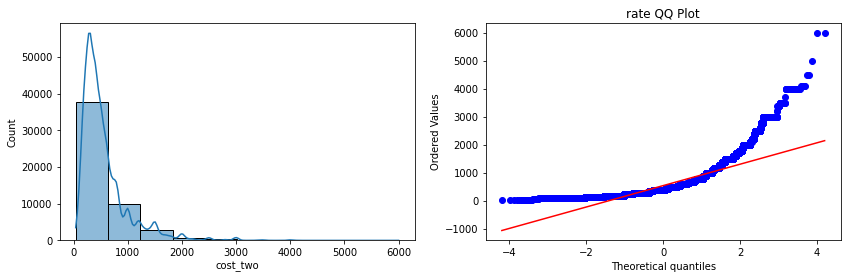

In [18]:

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x=data['cost_two'],kde=True,bins=10)

plt.subplot(122)
stats.probplot(data['cost_two'], dist="norm", plot=plt)
plt.title('rate QQ Plot')
plt.show()

<AxesSubplot:xlabel='votes'>

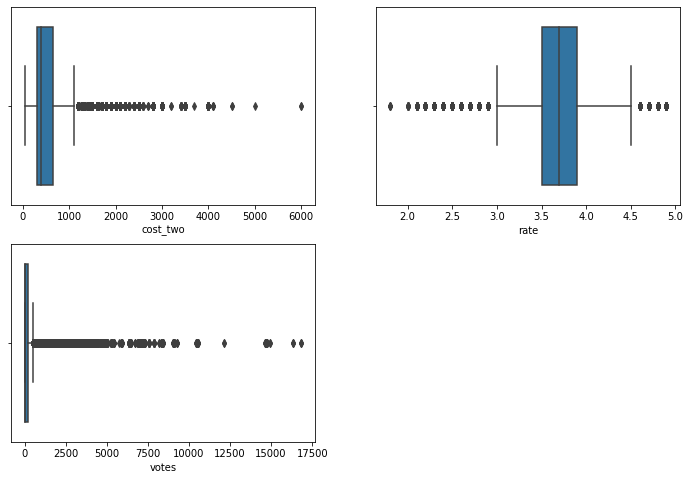

In [19]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x=data['cost_two'])
plt.subplot(2,2,2)
sns.boxplot(x=data['rate'])
plt.subplot(2,2,3)
sns.boxplot(x=data['votes'])

Text(0.5, 1.0, 'Distribution of restaurant rating over online order facility')

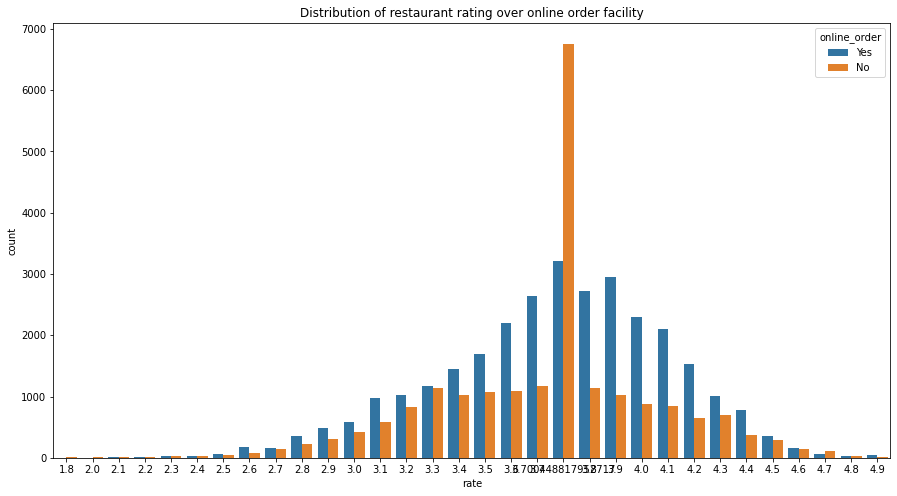

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x=data['rate'],hue=data['online_order'])
plt.title("Distribution of restaurant rating over online order facility")

In [21]:
x = data.drop(['rate'], axis = 1)
y = data['rate']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline 
from sklearn.preprocessing import MinMaxScaler

In [24]:
X_train

,online_order,book_table,votes,location,rest_type,cost_two,service_type
3540,Yes,No,66,Banashankari,Quick Bites,150.0,Dine-out
23124,No,No,0,Jayanagar,Takeaway,200.0,Desserts
35335,Yes,No,135,Jayanagar,Quick Bites,350.0,Delivery
17636,Yes,No,135,Old Airport Road,"Dessert Parlor, Cafe",700.0,Cafes
29377,Yes,No,138,Koramangala 8th Block,Quick Bites,250.0,Delivery
...,...,...,...,...,...,...,...
15772,Yes,Yes,765,Ulsoor,"Casual Dining, Bar",1200.0,Pubs and bars
1850,Yes,No,29,Bannerghatta Road,"Beverage Shop, Dessert Parlor",400.0,Desserts
19774,Yes,No,42,BTM,Quick Bites,800.0,Delivery
17522,Yes,Yes,847,Indiranagar,Casual Dining,1200.0,Buffet


In [25]:
#one hot encoding columns 
trf1=ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,3,4,6])
],remainder='passthrough')

In [26]:
#model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
trf2= RandomForestRegressor()


In [27]:
#Random forest 
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])


In [28]:
X_train.head()

,online_order,book_table,votes,location,rest_type,cost_two,service_type
3540,Yes,No,66,Banashankari,Quick Bites,150.0,Dine-out
23124,No,No,0,Jayanagar,Takeaway,200.0,Desserts
35335,Yes,No,135,Jayanagar,Quick Bites,350.0,Delivery
17636,Yes,No,135,Old Airport Road,"Dessert Parlor, Cafe",700.0,Cafes
29377,Yes,No,138,Koramangala 8th Block,Quick Bites,250.0,Delivery


In [29]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 6])])),
                ('trf2', RandomForestRegressor())])

In [30]:
from sklearn import set_config
set_config(display='diagram')
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [0, 1, 3, 4, 6])]),
 'trf2': RandomForestRegressor()}

In [31]:
from sklearn.metrics import r2_score,mean_absolute_error
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))

R2 score 0.9020303472306523


# Exporting model

In [32]:
import pickle
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))